In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matlab.engine

In [2]:
eng = matlab.engine.start_matlab()

In [3]:
data = eng.propagating_energy_sources();

In [4]:
dirname   = 'PES-rn'
bfilename = dirname + '/pes'
eng.mkdir( dirname )

True

In [5]:
myOpts = eng.struct( 'cmethod', 'phase',
        'spans', 21, 'detrend', 2,
        'errorRate', 0.1,
        'boolParfor', 0,
        'saveData', 0, 'boolUseSavedData', 0,
        'bfilename', bfilename);

In [6]:
eng.tic;
Components, Clusters, ClusterInfo, SDFInfo = eng.pasf(data, 4, myOpts, nargout=4)
eng.toc;

In [7]:
Components = np.array(Components._data).reshape(Components.size, order='F')
print( Components.shape )
d1, d2, d3, d4 = Components.shape

(20, 20, 1000, 6)


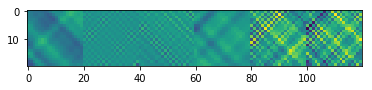

In [ ]:
for i in range(20):
    fig = Components[:,:,i,0]
    for c in range(1, d4):
        fig = np.hstack((fig, Components[:,:,i,c]))

    plt.imshow(fig)
    plt.show(block=False)
    time.sleep(0.5)
    plt.close()